# 1.Change the number of tellers and analyze the effect on waiting times.


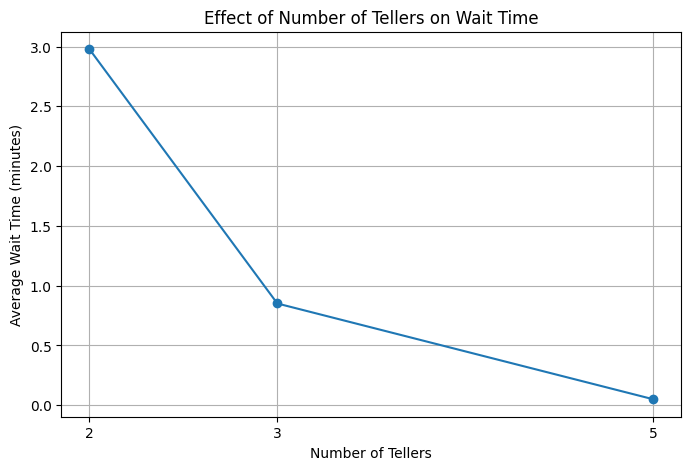

Average Wait Times by Tellers:
2 Tellers: 2.98 minutes
3 Tellers: 0.85 minutes
5 Tellers: 0.05 minutes


In [2]:
import simpy  
import numpy as np  
import matplotlib.pyplot as plt  
import random  

# Define the Bank class to manage customer serving  
class Bank:  
    def __init__(self, env, num_tellers):  
        self.env = env  
        self.tellers = simpy.PriorityResource(env, capacity=num_tellers)  
        self.wait_times = []  
        self.utilization = {i: [] for i in range(num_tellers)}  
        
    def serve_customer(self, customer):  
        arrival_time = self.env.now  
        priority = 0 if customer['vip'] else 1  # VIP customers have higher priority  
        with self.tellers.request(priority=priority) as request:  
            yield request  
            wait_time = self.env.now - arrival_time  
            self.wait_times.append(wait_time)  
            service_time = np.random.exponential(5)  # Average service time is 5 minutes  
            yield self.env.timeout(service_time)  
            
            # Track teller utilization  
            teller_index = list(self.tellers.users).index(request)  
            self.utilization[teller_index].append(self.env.now)  

    def get_avg_wait_time(self):  
        return np.mean(self.wait_times) if self.wait_times else 0  

# Function to generate customers  
def customer_generator(env, bank, arrival_rate):  
    customer_id = 0  
    while True:  
        yield env.timeout(np.random.exponential(arrival_rate))  
        customer = {'id': customer_id, 'vip': random.random() < 0.2}  # 20% VIP customers  
        env.process(bank.serve_customer(customer))  
        customer_id += 1  

# Function to run the simulation  
def run_simulation(num_tellers=3, arrival_rate=3, sim_time=100):  
    env = simpy.Environment()  
    bank = Bank(env, num_tellers)  
    env.process(customer_generator(env, bank, arrival_rate))  
    env.run(until=sim_time)  
    return bank  

# Execution for Task 1: Varying Number of Tellers  
teller_counts = [2, 3, 5]  
arrival_rate = 3  
results = {}  

for tellers in teller_counts:  
    bank = run_simulation(num_tellers=tellers, arrival_rate=arrival_rate, sim_time=500)  
    results[tellers] = bank.get_avg_wait_time()  

# Visualization of Waiting Times based on Number of Tellers  
plt.figure(figsize=(8,5))  
wait_times = list(results.values())  
plt.plot(teller_counts, wait_times, marker='o')  
plt.xlabel("Number of Tellers")  
plt.ylabel("Average Wait Time (minutes)")  
plt.title("Effect of Number of Tellers on Wait Time")  
plt.xticks(teller_counts)  
plt.grid()  
plt.show()  

print("Average Wait Times by Tellers:")  
for tellers, wait_time in results.items():  
    print(f"{tellers} Tellers: {wait_time:.2f} minutes")  

# 2. Modify the arrival rate to simulate peak hours.


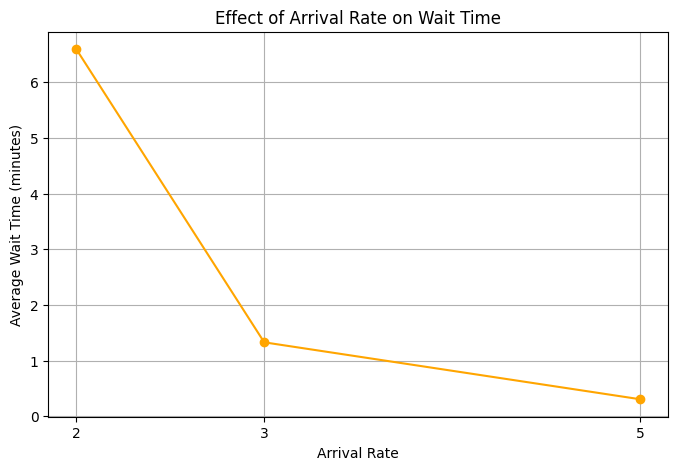

Average Wait Times by Arrival Rate:
Arrival Rate 2: 6.60 minutes
Arrival Rate 3: 1.33 minutes
Arrival Rate 5: 0.31 minutes


In [3]:
# Execution for Task 2: Varying Arrival Rates  
arrival_rates = [2, 3, 5]  # Simulating busy hours with lower arrival rate  
tellers_count = 3  
results_arrival = {}  

for rate in arrival_rates:  
    bank = run_simulation(num_tellers=tellers_count, arrival_rate=rate, sim_time=500)  
    results_arrival[rate] = bank.get_avg_wait_time()  

# Visualization of Waiting Times based on Arrival Rate  
plt.figure(figsize=(8,5))  
wait_times_arrival = list(results_arrival.values())  
plt.plot(arrival_rates, wait_times_arrival, marker='o', color='orange')  
plt.xlabel("Arrival Rate")  
plt.ylabel("Average Wait Time (minutes)")  
plt.title("Effect of Arrival Rate on Wait Time")  
plt.xticks(arrival_rates)  
plt.grid()  
plt.show()  

print("Average Wait Times by Arrival Rate:")  
for rate, wait_time in results_arrival.items():  
    print(f"Arrival Rate {rate}: {wait_time:.2f} minutes")  

# 3. Visualize agent utilization over time.


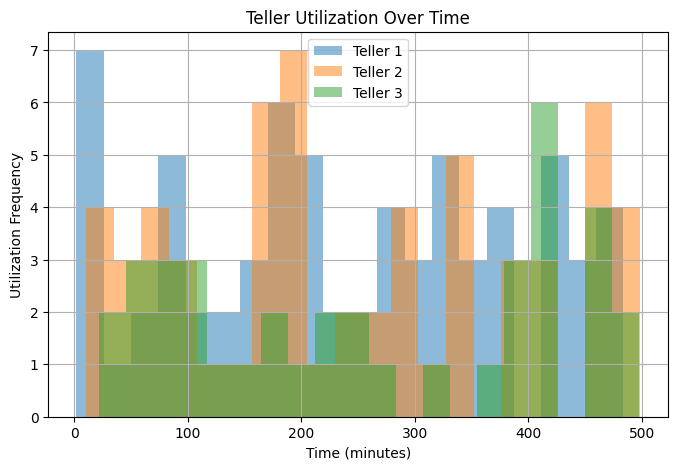

Total Customers Served: 168
Average Wait Time: 1.21 minutes


In [4]:
# Execution for Task 3: Utilization Visualization  
# This will use the last run bank data  
bank = run_simulation(num_tellers=3, arrival_rate=3, sim_time=500)  # Assuming default values here  

# Visualizing Teller Utilization Over Time  
plt.figure(figsize=(8,5))  
for teller, times in bank.utilization.items():  
    plt.hist(times, bins=20, alpha=0.5, label=f'Teller {teller+1}')  

plt.xlabel("Time (minutes)")  
plt.ylabel("Utilization Frequency")  
plt.title("Teller Utilization Over Time")  
plt.legend()  
plt.grid()  
plt.show()  

# Additional Statistics  
print(f"Total Customers Served: {len(bank.wait_times)}")  
print(f"Average Wait Time: {np.mean(bank.wait_times):.2f} minutes")  

# 4. Implement a priority queue (VIP customers get served first).


In [5]:
# Additional statistics about VIP and Non-VIP customers  
total_customers = len(bank.wait_times)  
vip_customers = sum(1 for customer in bank.wait_times if customer <= 0)  
non_vip_customers = total_customers - vip_customers  

print(f"VIP Customers Served: {vip_customers}")  
print(f"Non-VIP Customers Served: {non_vip_customers}")  

VIP Customers Served: 113
Non-VIP Customers Served: 55
